In [1]:
import pandas as pd

In [2]:
performance=pd.read_csv('Student_Performance.csv')

In [3]:
performance.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [7]:
performance=performance.drop(columns=['Extracurricular Activities'])

In [8]:
performance.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [9]:
import matplotlib.pyplot as plt

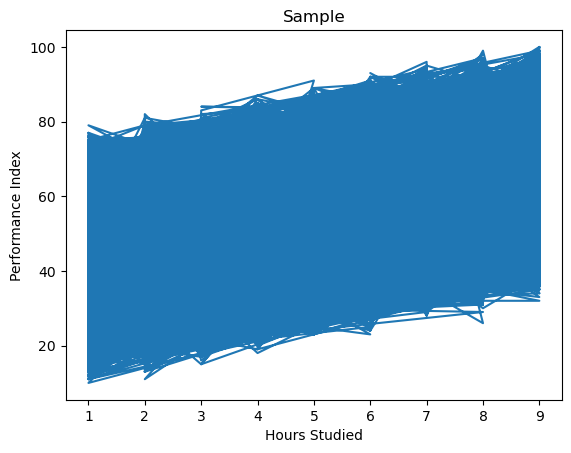

In [10]:
plt.plot(performance['Hours Studied'],performance['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Sample')
plt.show()

In [11]:
import seaborn as sns

C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

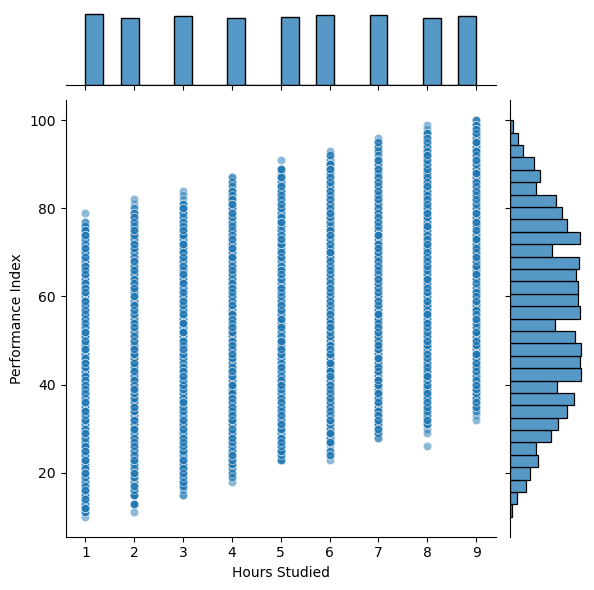

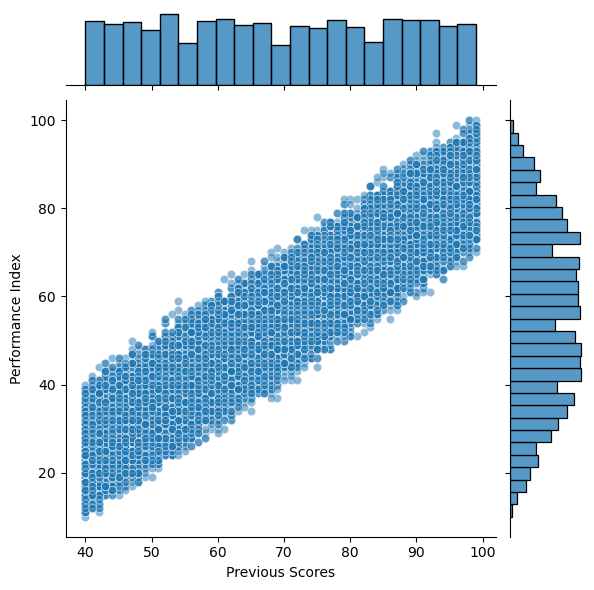

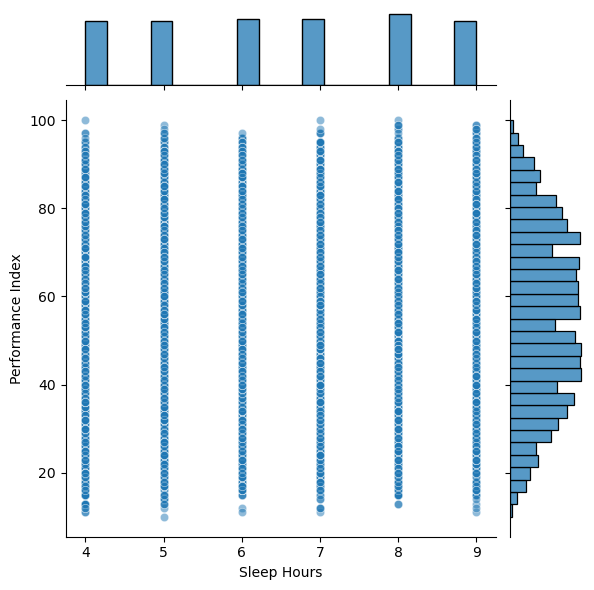

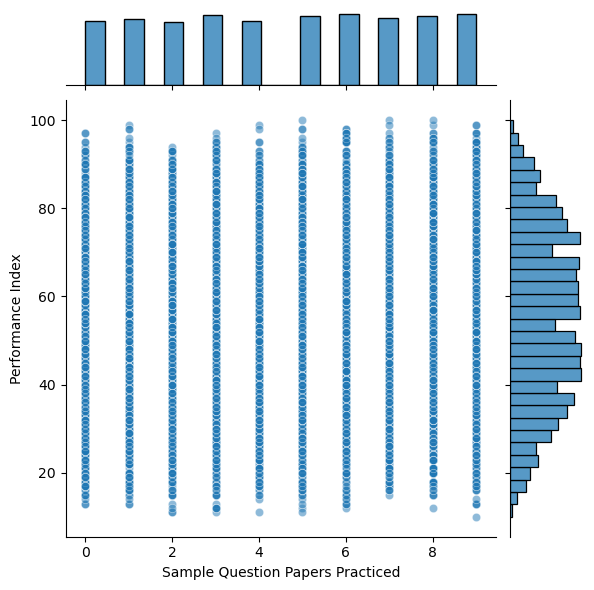

In [13]:
sns.jointplot(x='Hours Studied', y='Performance Index', data=performance, alpha=0.5)
sns.jointplot(x='Previous Scores', y='Performance Index', data=performance, alpha=0.5)
sns.jointplot(x='Sleep Hours', y='Performance Index', data=performance, alpha=0.5)
sns.jointplot(x='Sample Question Papers Practiced', y='Performance Index', data=performance, alpha=0.5)


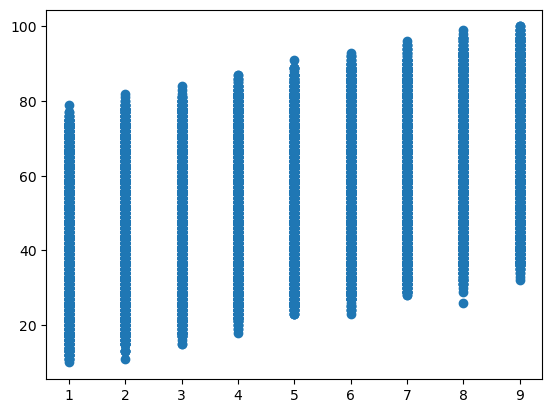

In [17]:
plt.scatter(performance['Hours Studied'],performance['Performance Index'])
plt.show()

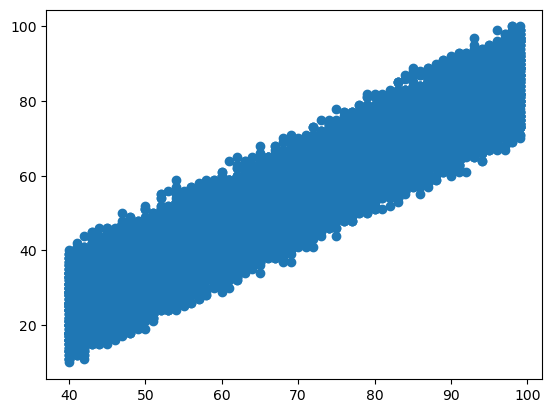

In [18]:
plt.scatter(performance['Previous Scores'],performance['Performance Index'])
plt.show()

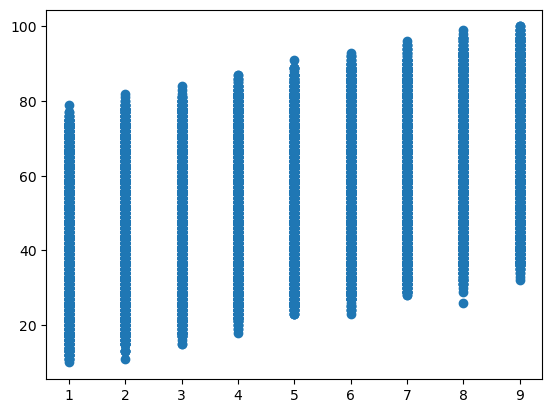

In [19]:
plt.scatter(performance['Hours Studied'],performance['Performance Index'])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
x=performance[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y=performance['Performance Index']

In [24]:
x.head

<bound method NDFrame.head of       Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  
0                                    1  
1                                    2  
2                                    2  
3                                    2  
4                                    5  
...                                ...  
9995                                 2  
9996 

In [25]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [26]:
len(x)

10000

In [27]:
len(y)

10000

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)


In [30]:
x_train.shape

(7000, 4)

In [31]:
y_train.shape

(7000,)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear=LinearRegression()

In [34]:
linear.fit(x_train,y_train)

LinearRegression()

In [35]:
linear.intercept_

-33.53688143189799

In [36]:
linear.coef_

array([2.85920197, 1.01565817, 0.47654598, 0.18934393])

In [39]:
y_pred=linear.predict(x_test)

In [40]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [41]:
y_pred

array([55.03059814, 22.32273388, 47.63693161, ..., 33.12737237,
       67.62296094, 30.90828347])

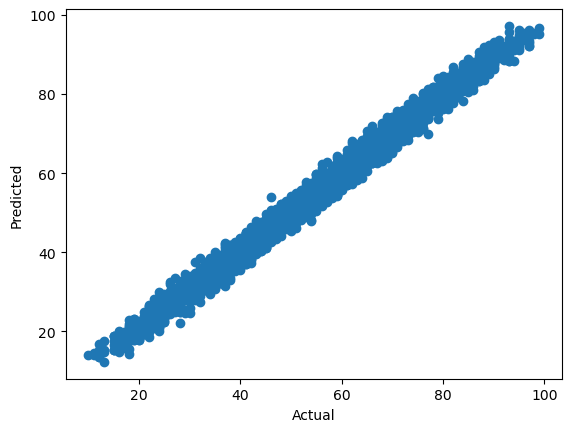

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  1.6301766341063662


In [47]:
from sklearn.metrics import  mean_squared_error

In [48]:
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred))

Mean Squared Error:  4.181379974575141


In [49]:
import math

In [51]:
print('Root Mean Squared Error is : ',math.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error is :  2.0448422859905704


In [52]:
residual=y_test-y_pred

In [53]:
residual

6252   -4.030598
4684   -2.322734
1731   -1.636932
4742   -3.035061
4521   -2.349663
          ...   
8014    0.488393
1074    2.217758
3063   -0.127372
6487    1.377039
4705   -1.908283
Name: Performance Index, Length: 3000, dtype: float64

C:\Users\praga\AppData\Local\Temp\ipykernel_13896\2939729699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins = 40)
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Performance Index', ylabel='Density'>

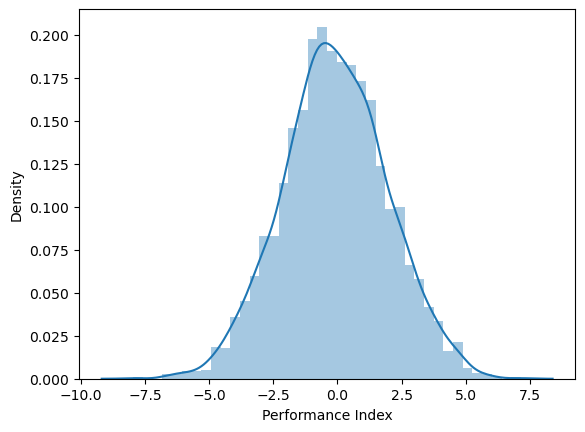

In [54]:
sns.distplot(residual, bins = 40)

C:\Users\praga\AppData\Local\Temp\ipykernel_13896\1665348998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins = 60)
C:\Users\praga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Performance Index', ylabel='Density'>

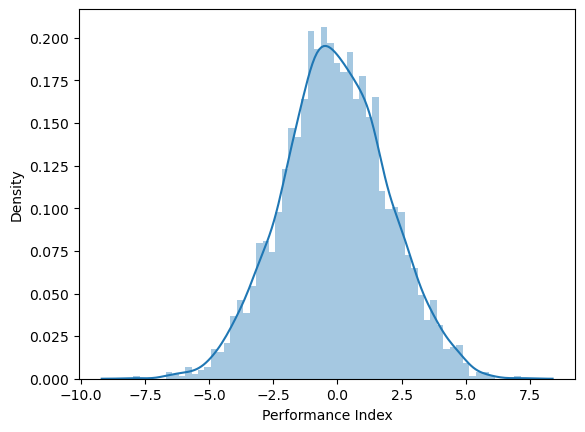

In [58]:
sns.distplot(residual, bins = 60)